# Plotting with ACS plotting script and regional statistics
Using code from https://github.com/AusClimateService/plotting_maps/tree/main

In [10]:
x = np.arange(1,14,1)
np.quantile(x,[0.1,0.9],method = "nearest")

array([ 2, 12])

In [9]:
np.quantile(x,[0.1,0.9])

array([ 2.2, 11.8])

In [37]:
cd /g/data/mn51/users/dh4185/repos_collab/plotting_maps

/g/data/mn51/users/dh4185/repos_collab/plotting_maps


In [38]:
# import ACS plotting maps and Xarray.
import sys
sys.path.append("/g/data/mn51/users/dh4185/repos_collab/plotting_maps")

# import needed packages
from acs_area_statistics import get_regions, acs_regional_stats # this line has been updated 19 August 2024
regions = get_regions(["ncra_regions", "australia"]) # this line has been updated 19 August 2024
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr
import numpy as np
import lib_david
import pandas as pd

In [39]:
root_dir = "/g/data/ia39/ncra/drought_aridity/ai/"
index = "AI-atmospheric-based"
index_short = "AI"
data_type = "2D"
rcp = "rcp85"
mme_set = ["model","bc"]
quantiles = [0.1,0.5,0.9]

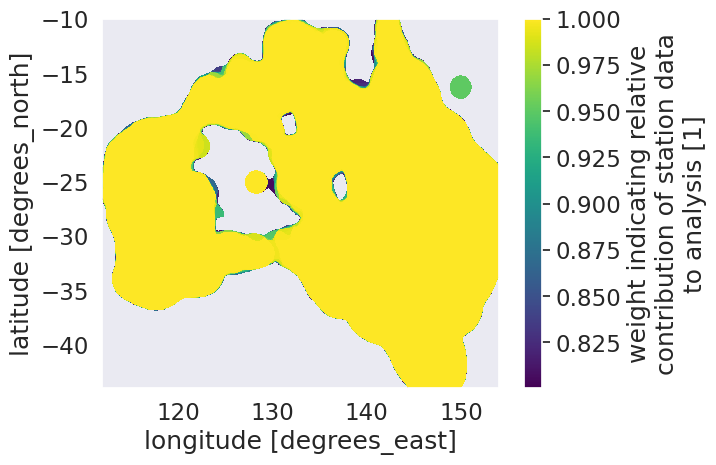

In [40]:
#< AGCD masking
mask_ds = xr.open_dataset("/g/data/mn51/users/dh4185/agcd_v1-0-2_precip_weight_r005_daily_1975_2005fraction_ge1.nc").sel(lat=slice(-44,-10),lon=slice(112,154))
q_mask = np.ma.masked_greater(mask_ds.fraction,0.8)
mask_ds.fraction.where(q_mask.mask).plot()

In [5]:
#< If mask file doesn't exist, run below command to create it
# python3 /g/data/mn51/users/dh4185/hazards-drought/AGCD_masking.py --ClimStartYr 1975 --ClimEndYr 2005

### GWLs

GWL: GWL1.2
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL1.5
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL2.0
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL3.0
Percentile: 10
Percentile: 50
Percentile: 90


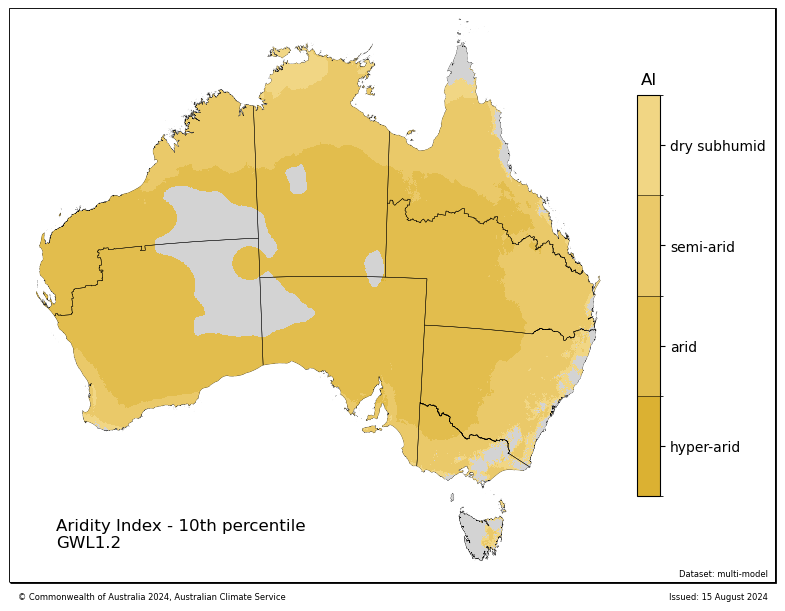

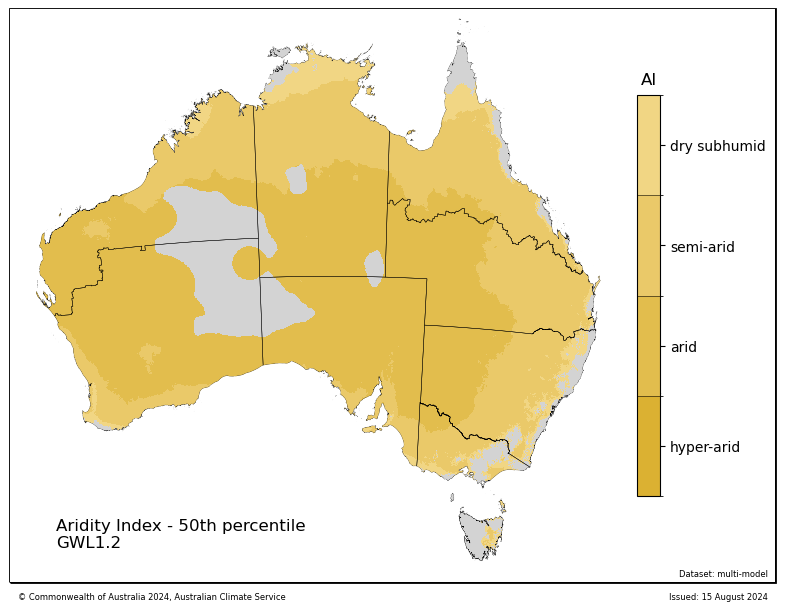

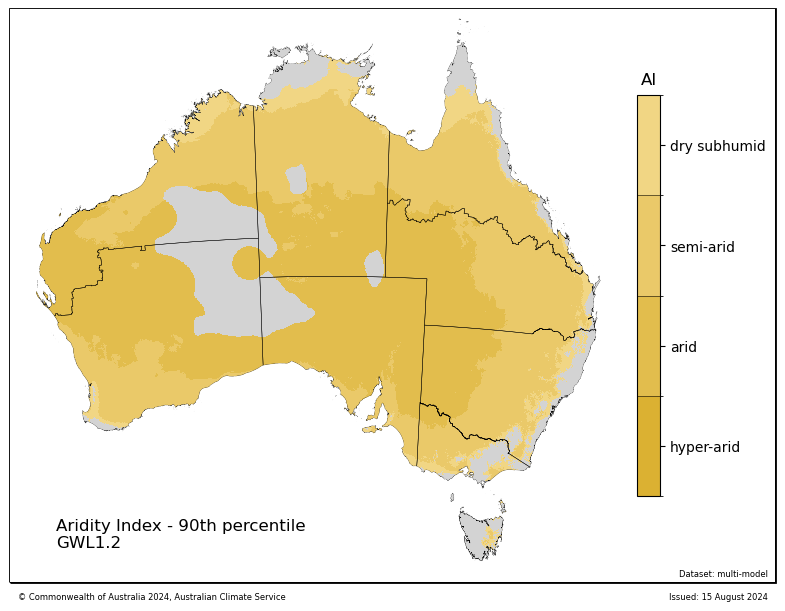

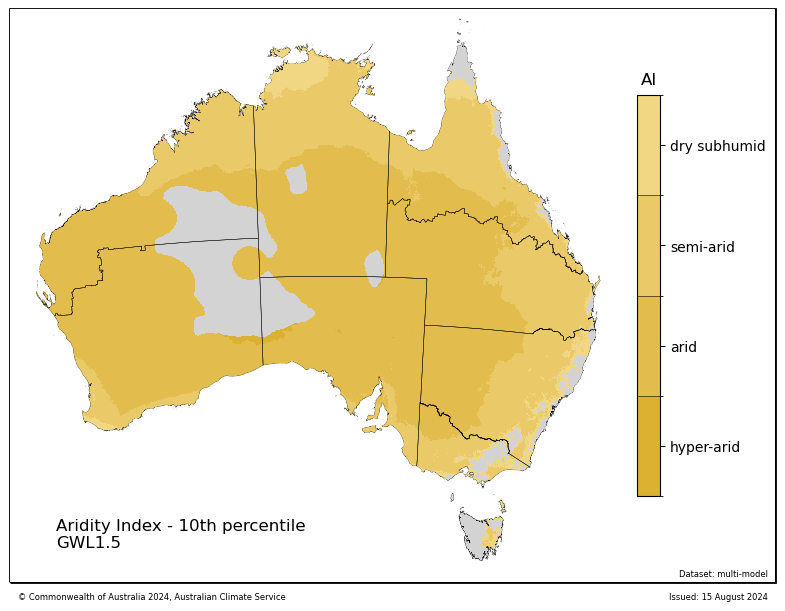

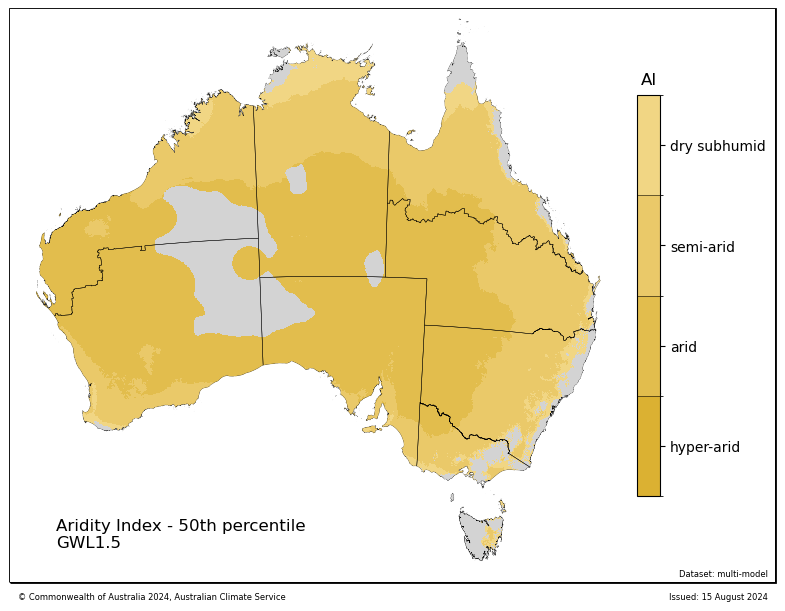

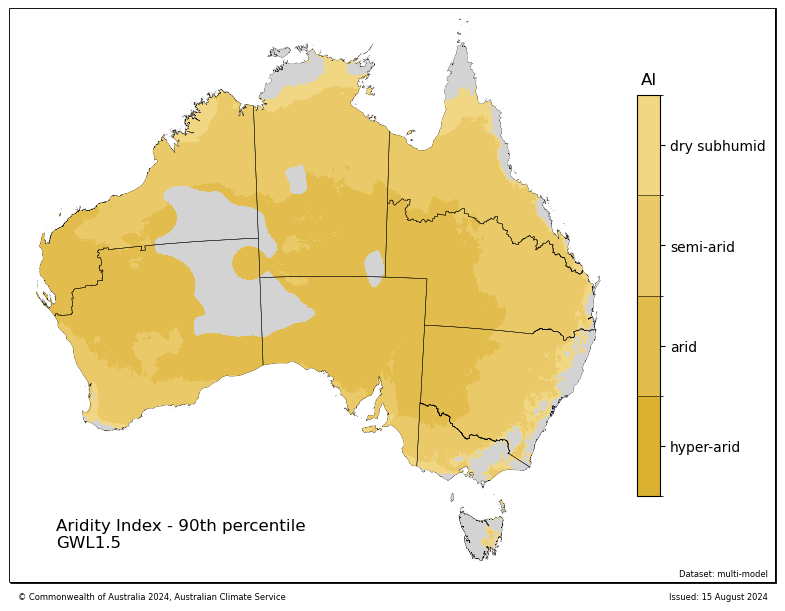

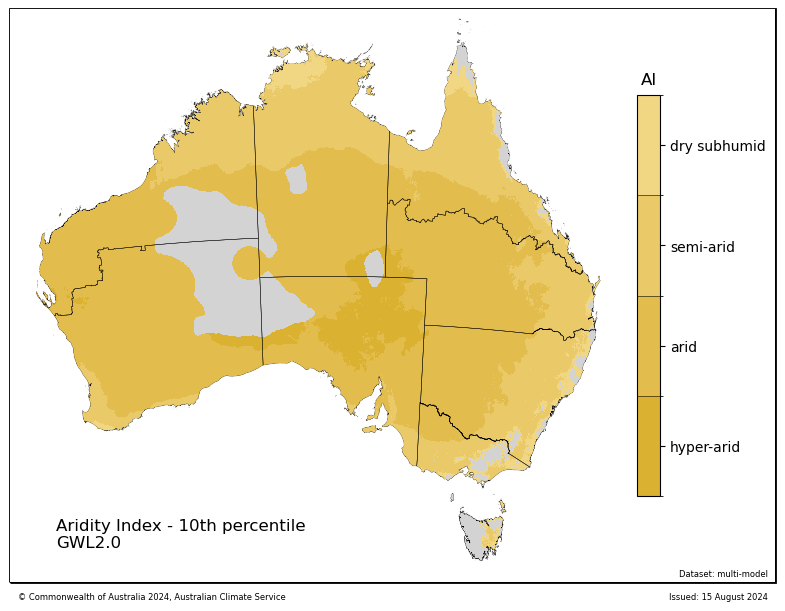

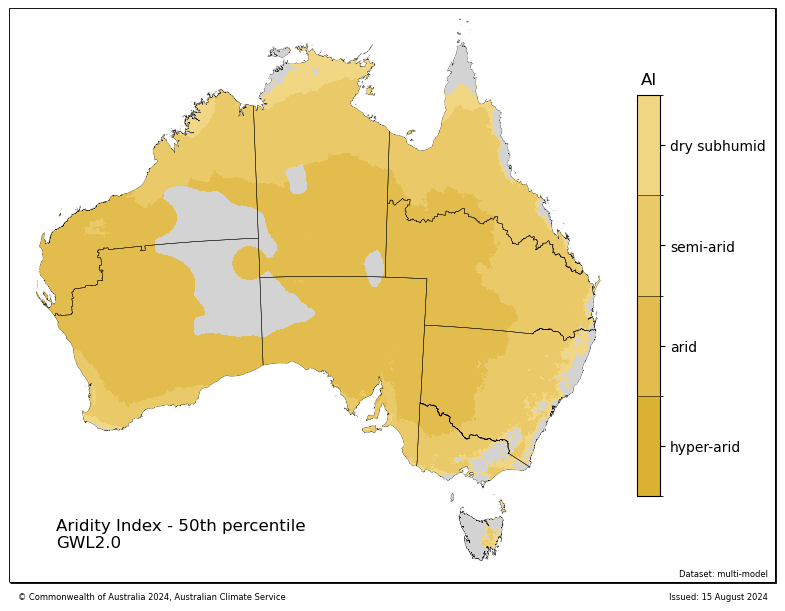

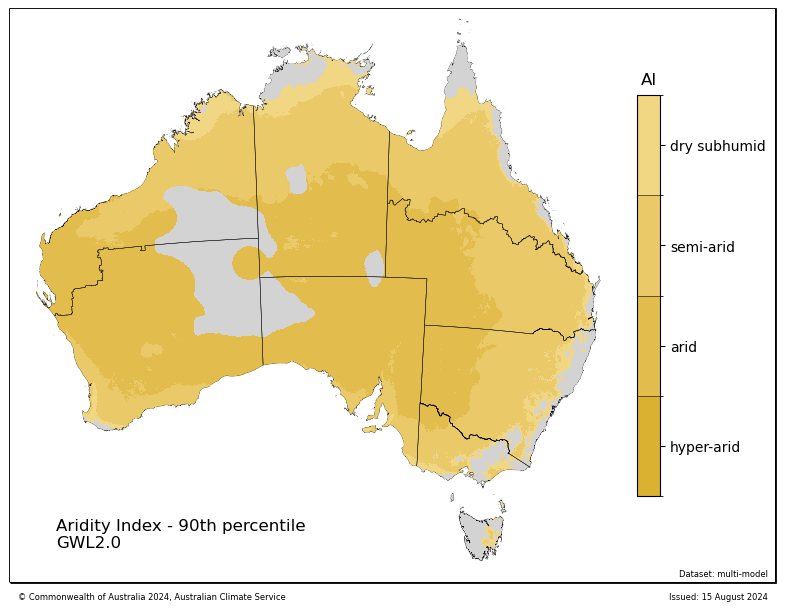

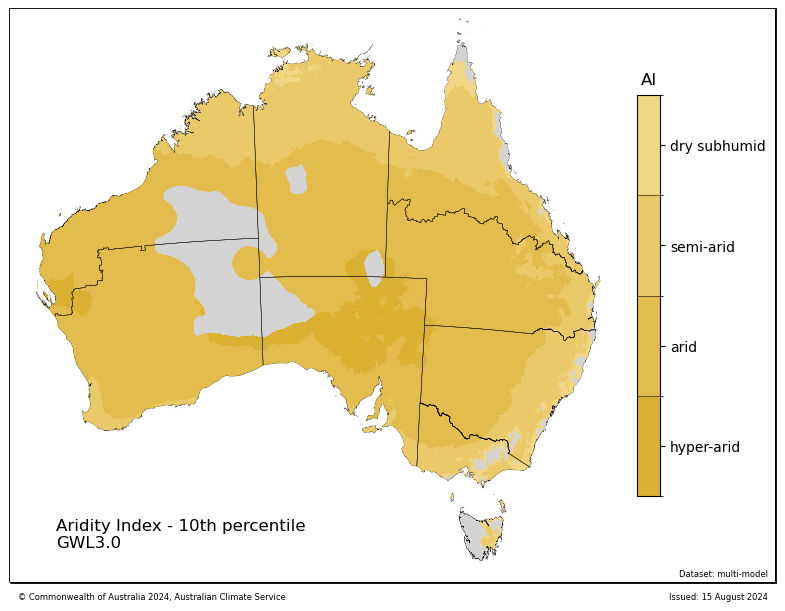

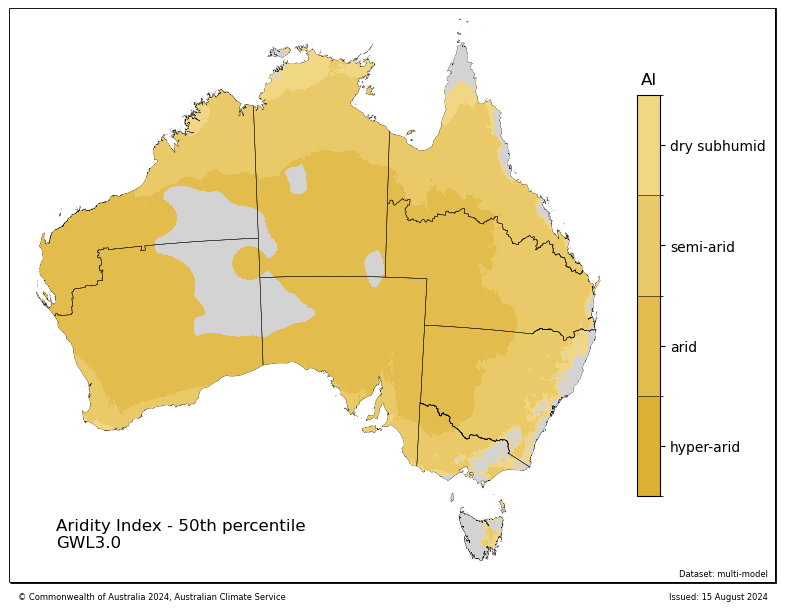

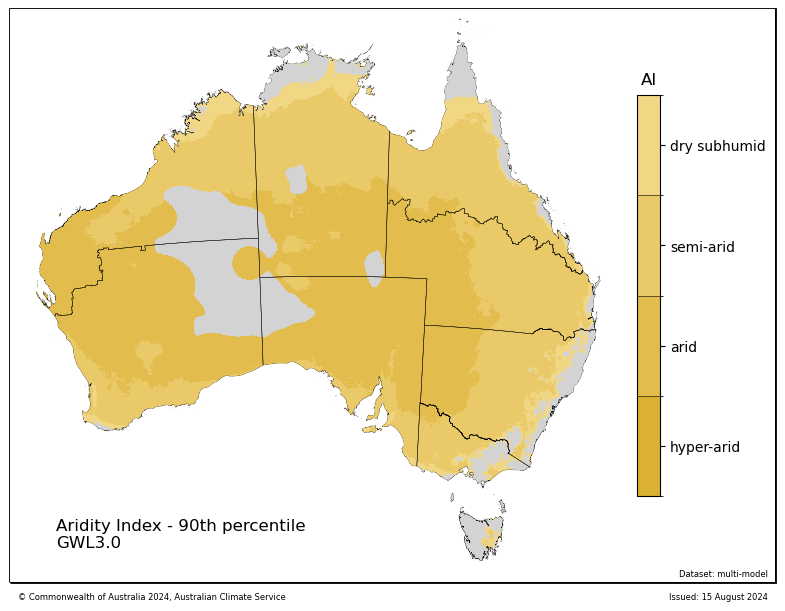

In [6]:
# GWLs
gwl = ["GWL12","GWL15","GWL20","GWL30"]
for _gwl in gwl:
    quantiles_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{_gwl}_percentiles10-50-90.nc")
    print(f"GWL: {_gwl[:4]}.{_gwl[4:]}")
    for q in quantiles:
        prcntl = int(q*100)
        print(f"Percentile: {prcntl}")
        quantiles_da = quantiles_ds.AI.sel(quantile=q).where(q_mask.mask)
        
        plot_acs_hazard(data =  quantiles_da.where(quantiles_da<0.65),
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index - {prcntl}th percentile ",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["aridity"],
                ticks = tick_dict['aridity_index_ticks'],
                tick_labels = ["hyper-arid","arid","semi-arid","dry subhumid"],#tick_dict['aridity_index_labels'],
                cbar_label = "AI",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{_gwl}_percentile{prcntl}_plot.png",
                );

GWL: GWL1.5
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL2.0
Percentile: 10
Percentile: 50
Percentile: 90
GWL: GWL3.0
Percentile: 10


/g/data/mn51/users/dh4185/repos_collab/plotting_maps/acs_plotting_maps.py:443: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(


Percentile: 50
Percentile: 90


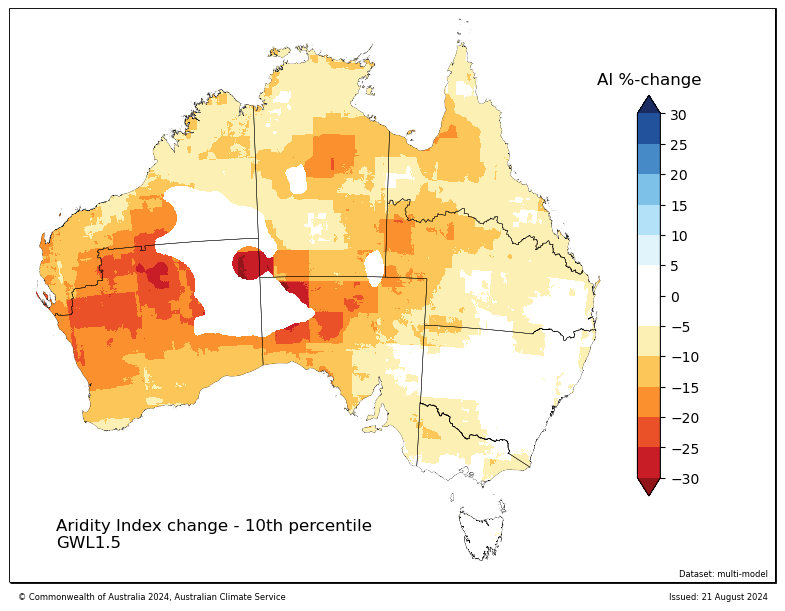

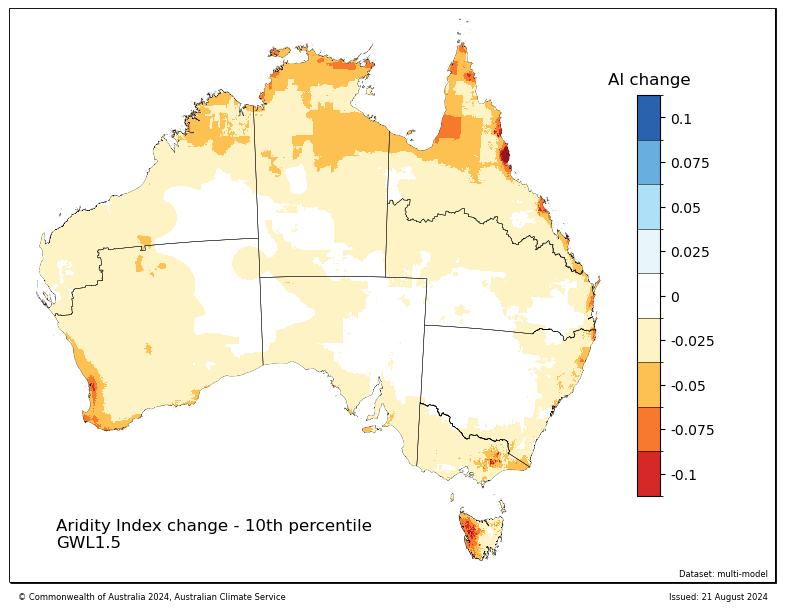

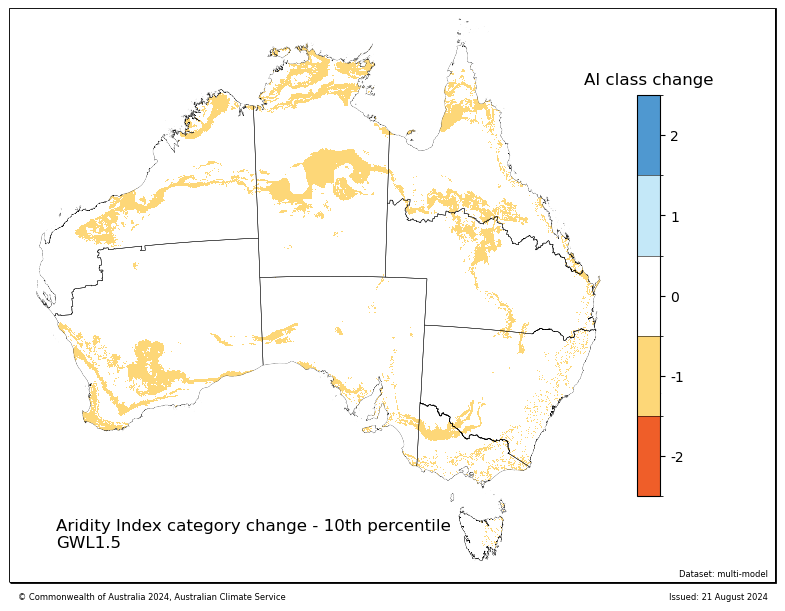

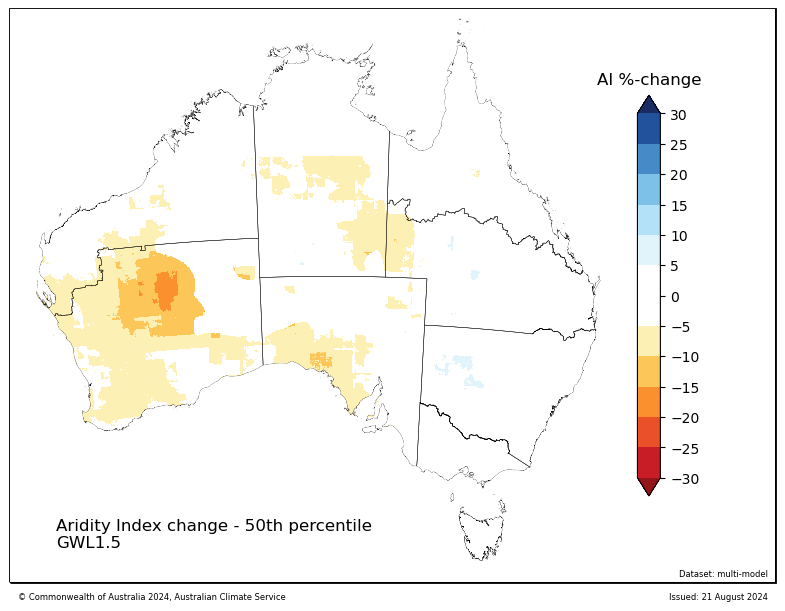

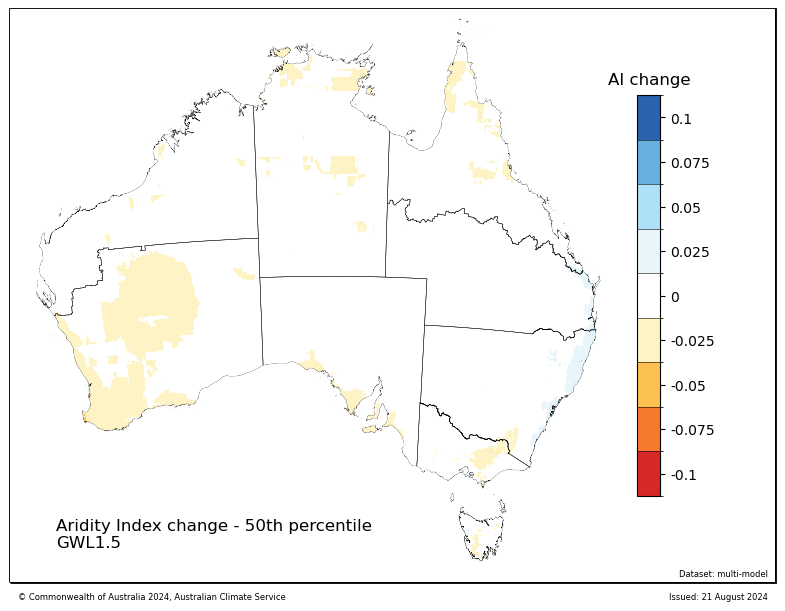

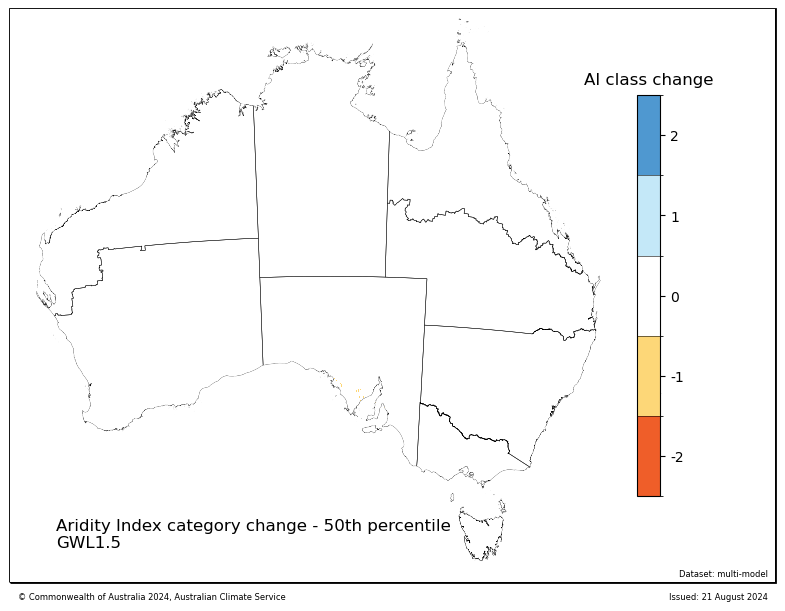

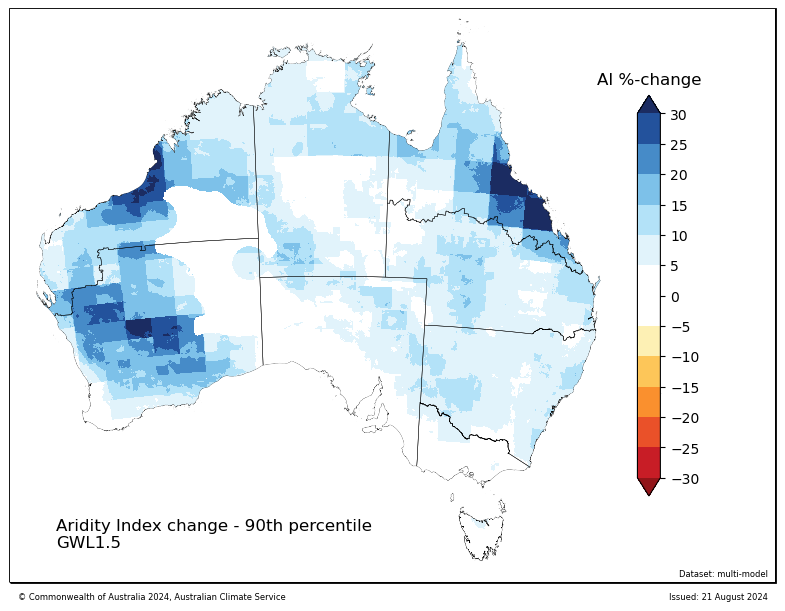

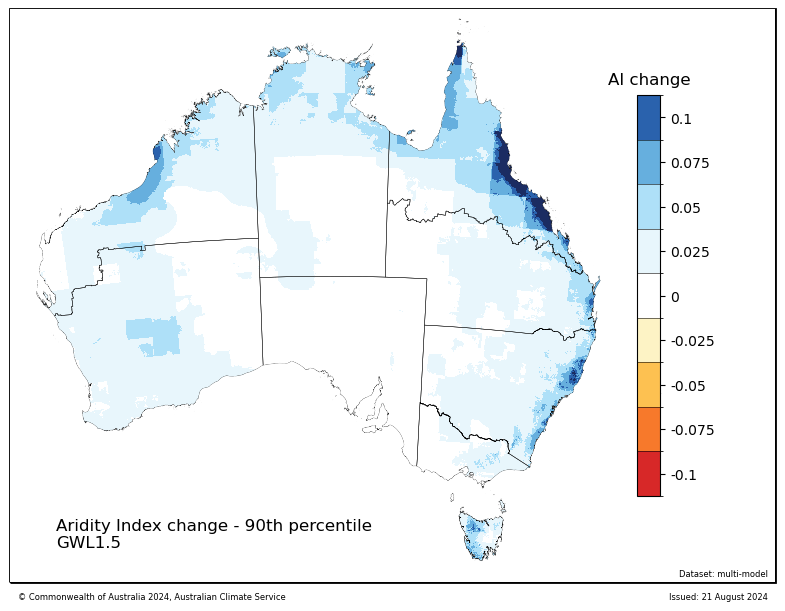

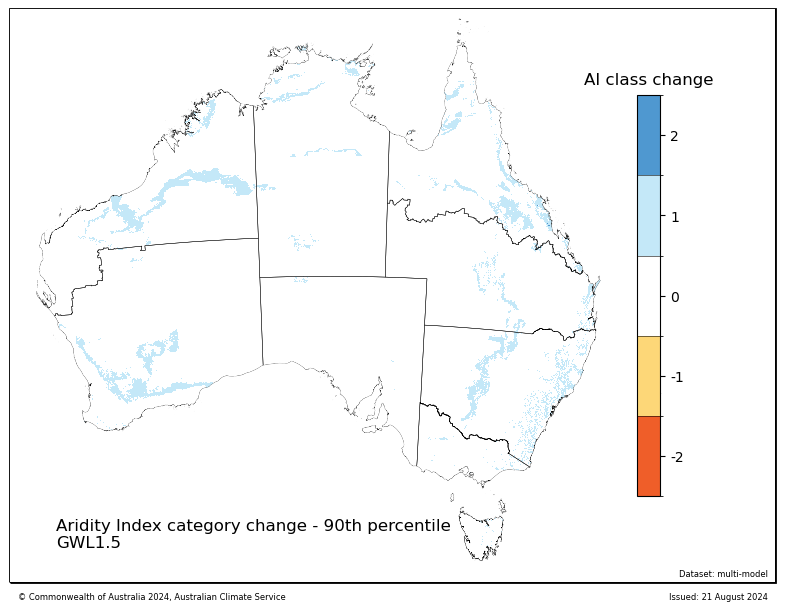

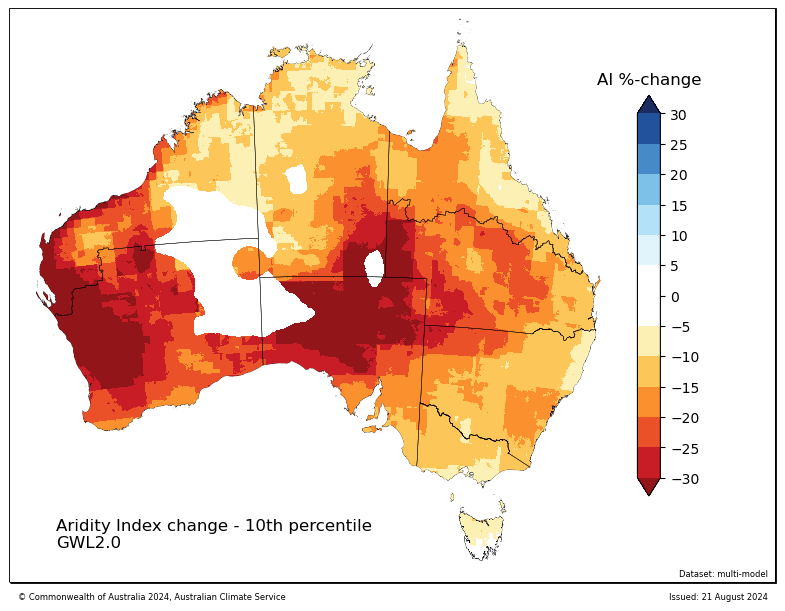

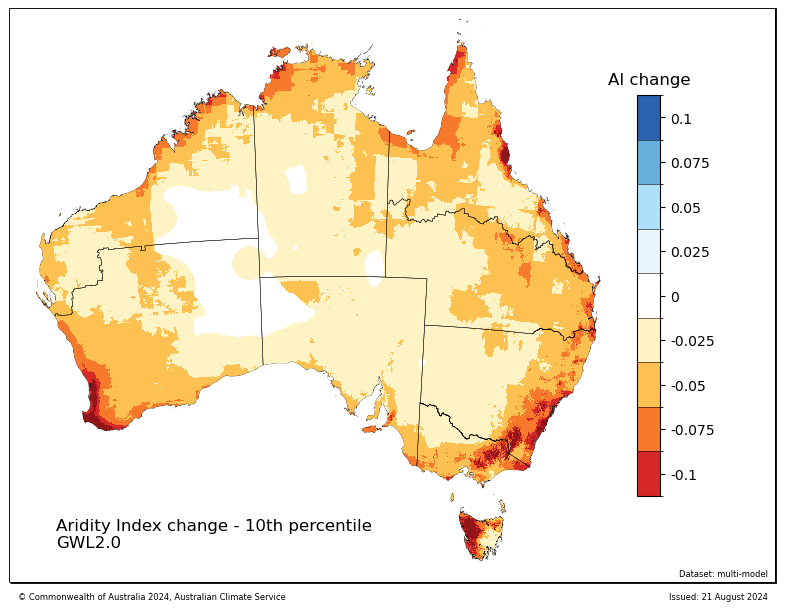

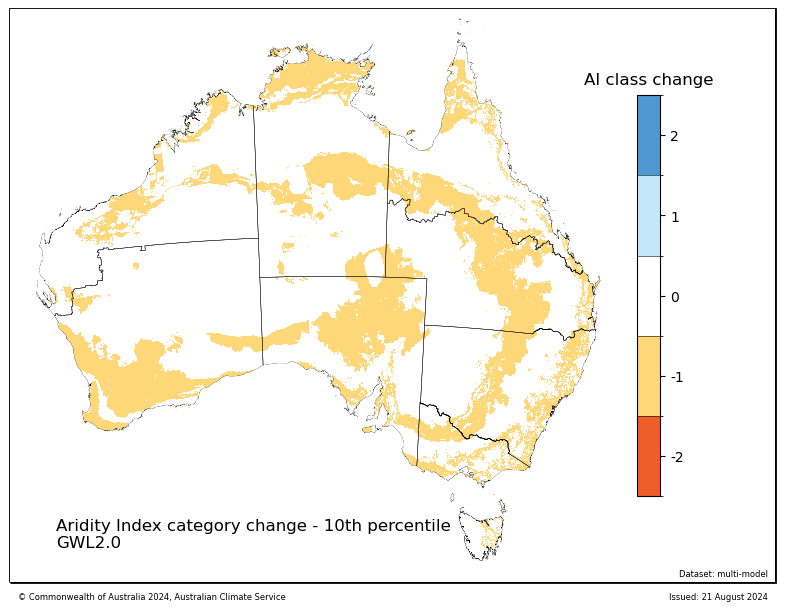

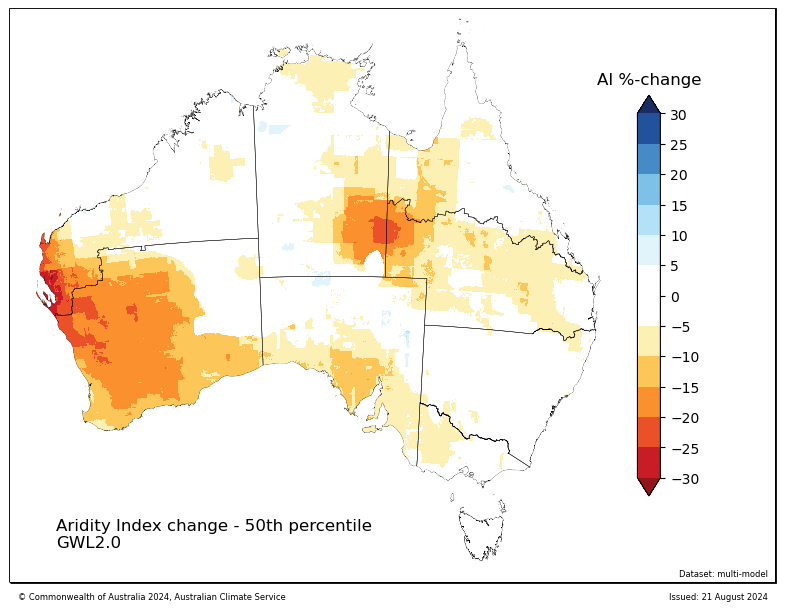

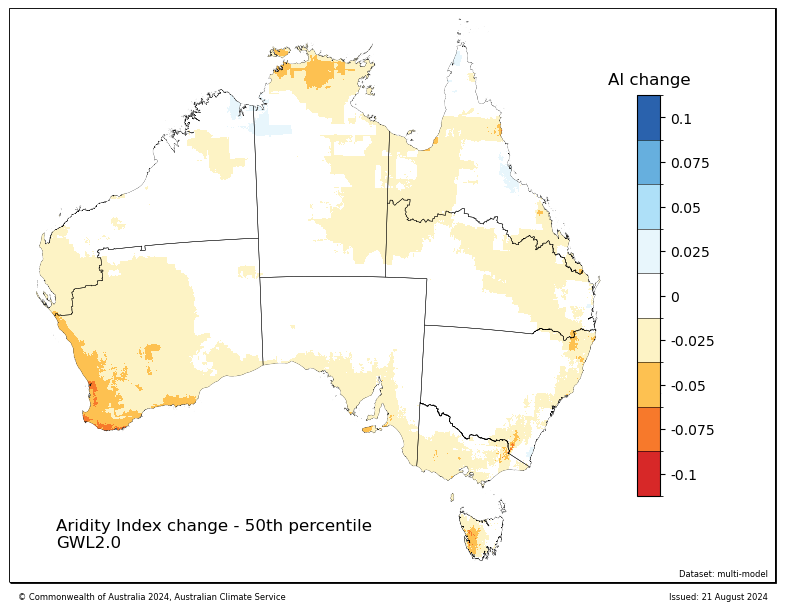

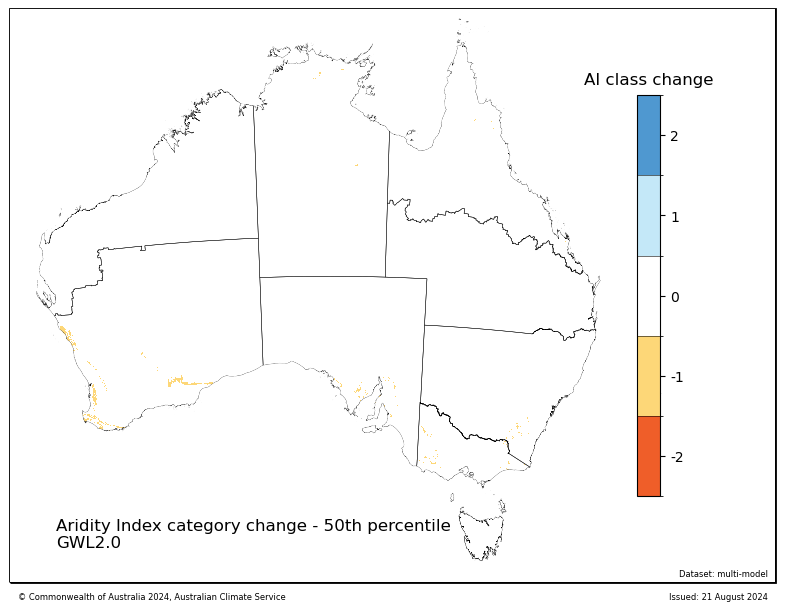

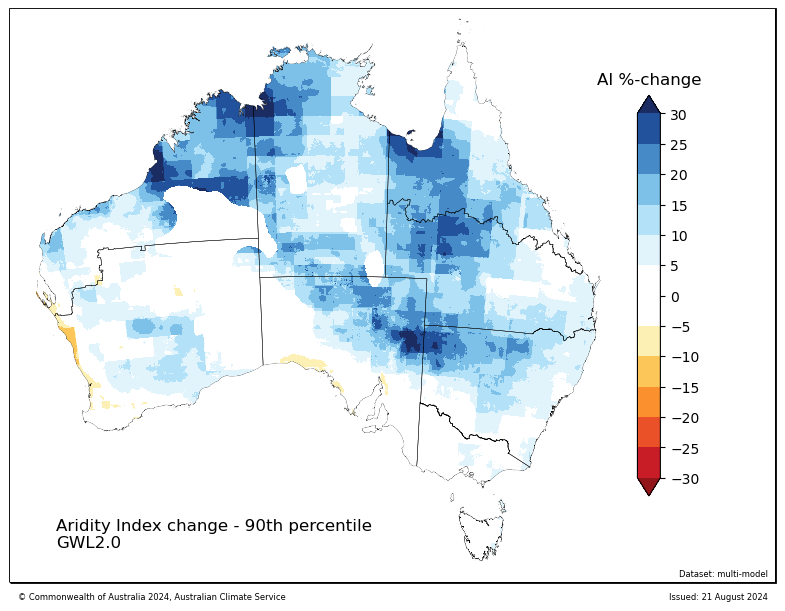

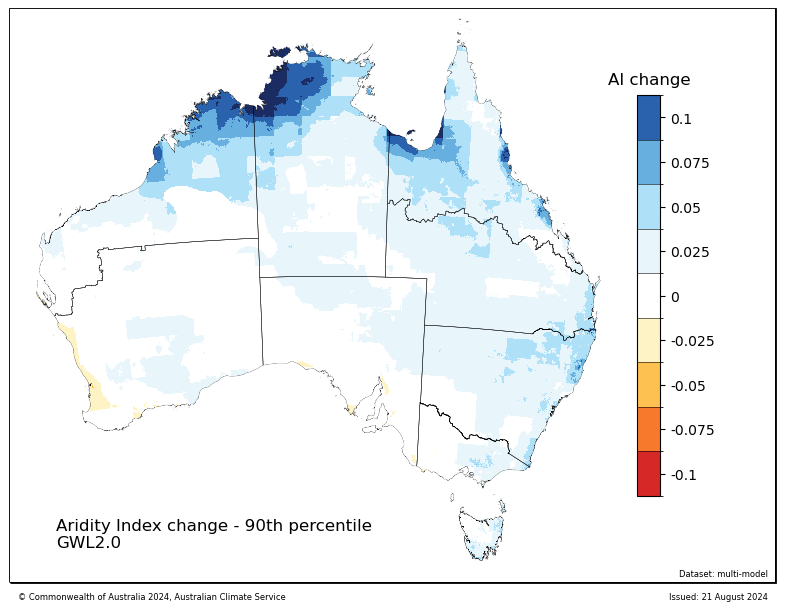

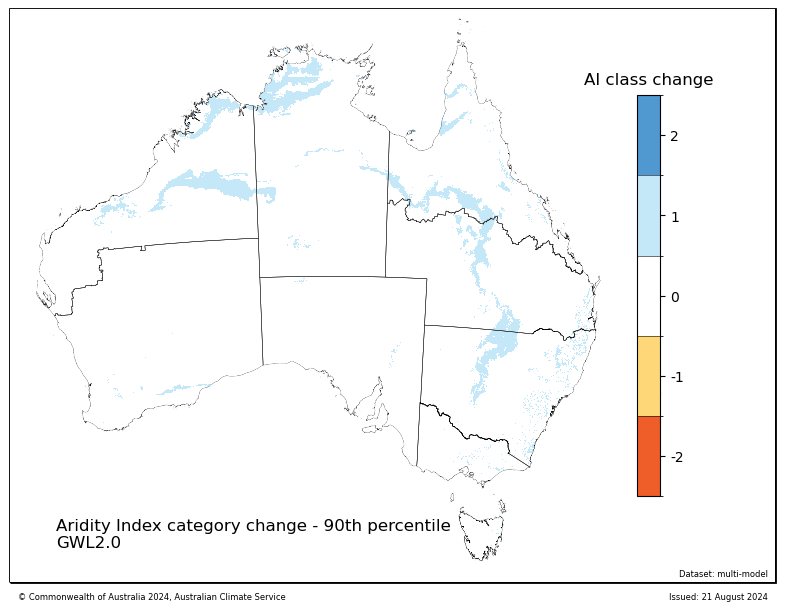

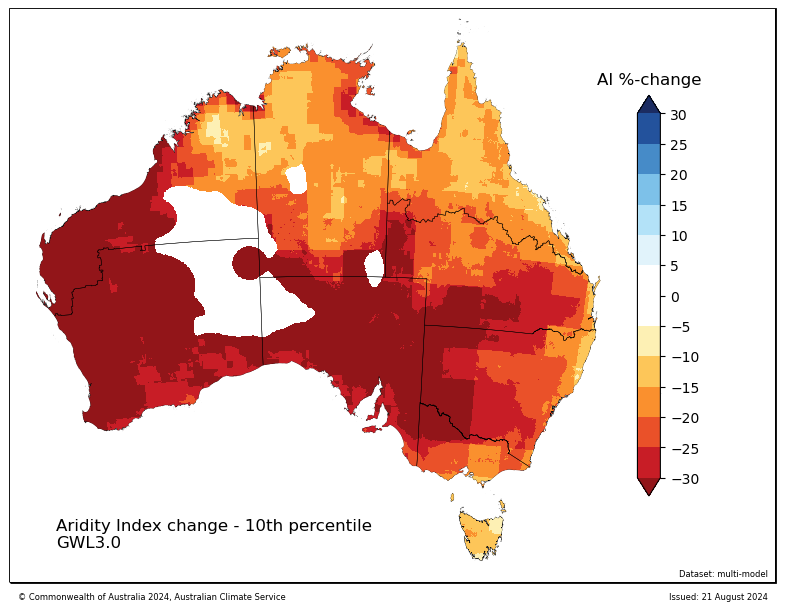

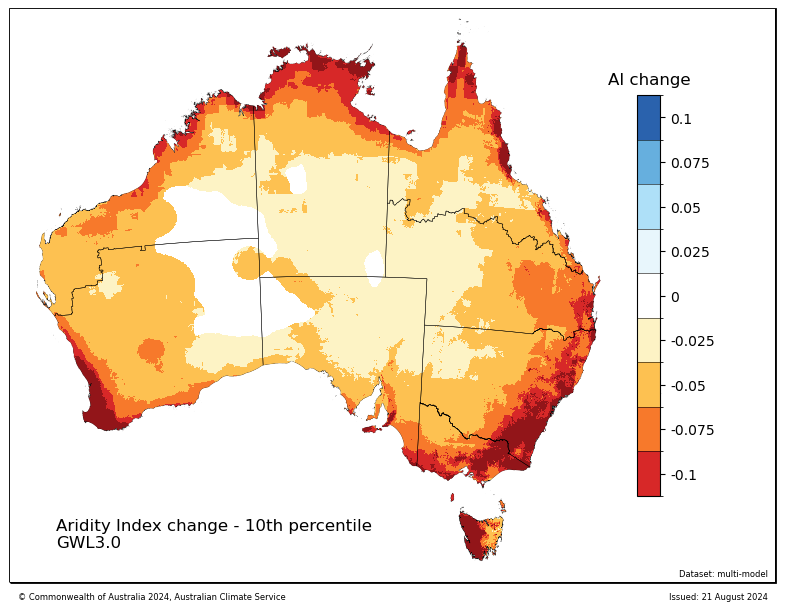

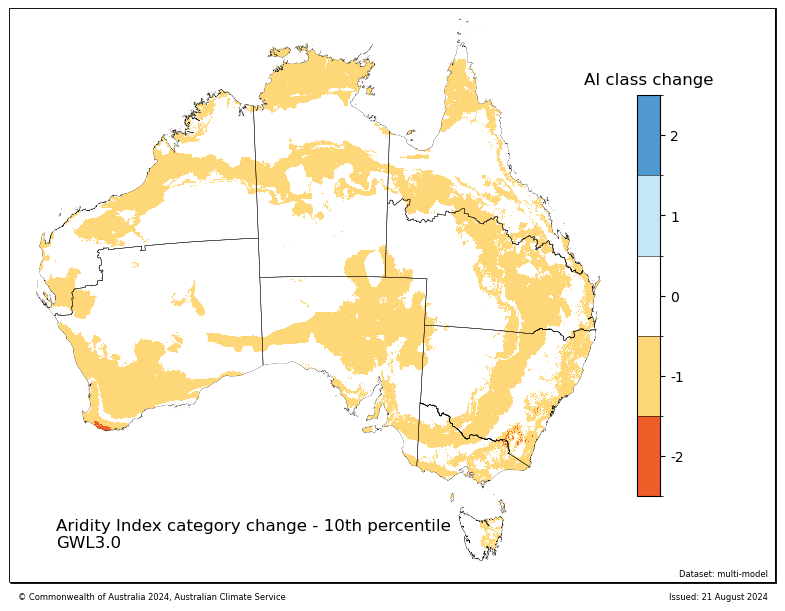

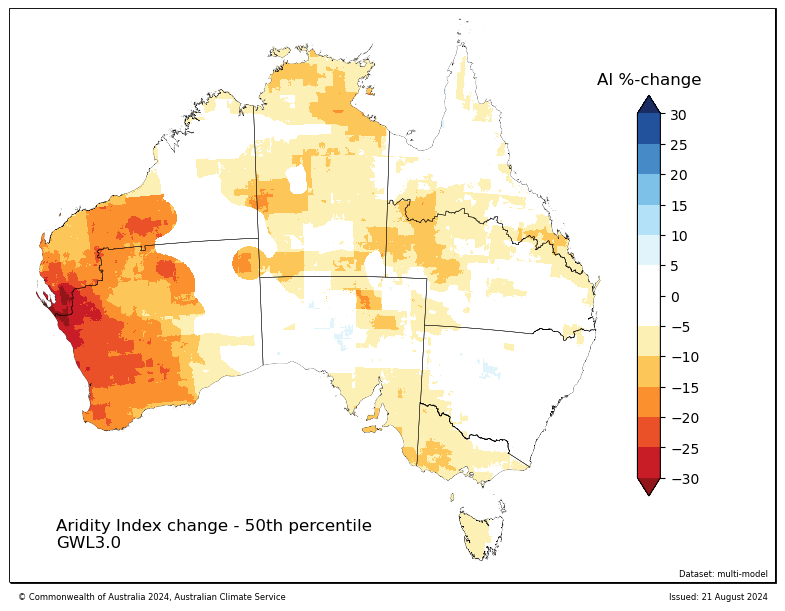

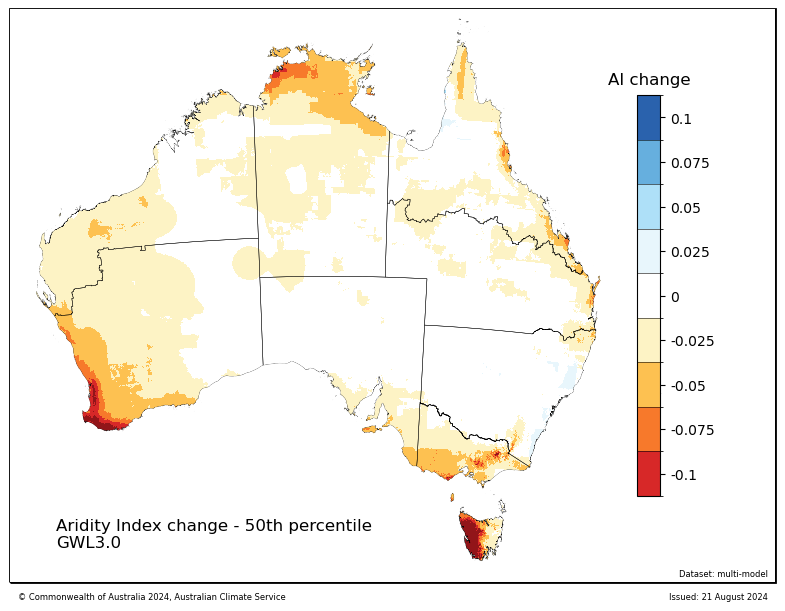

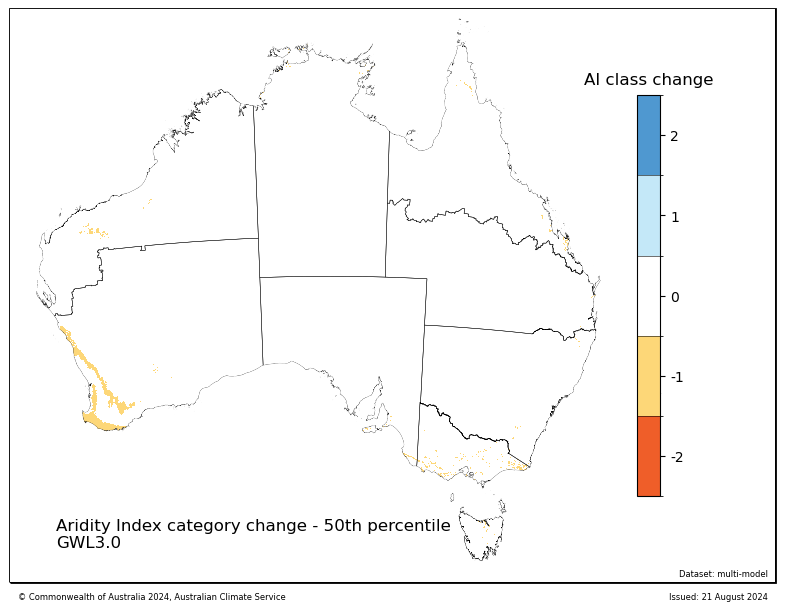

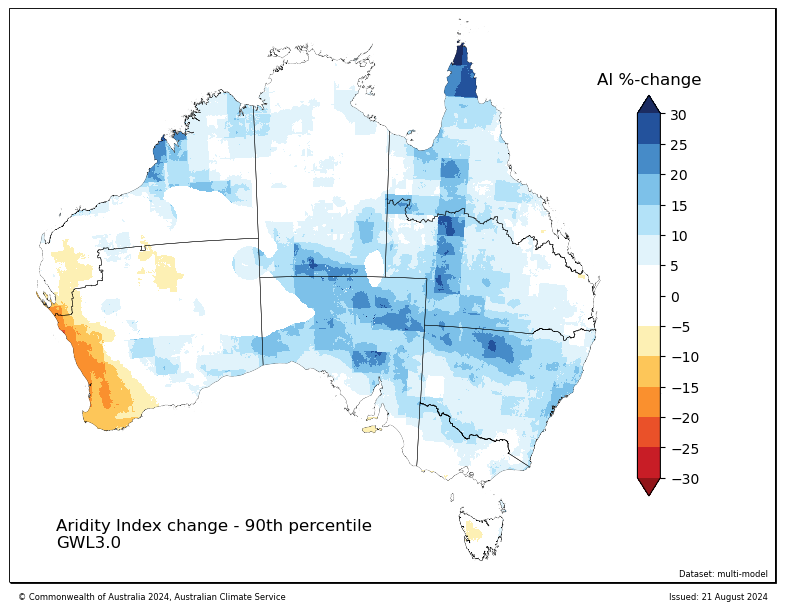

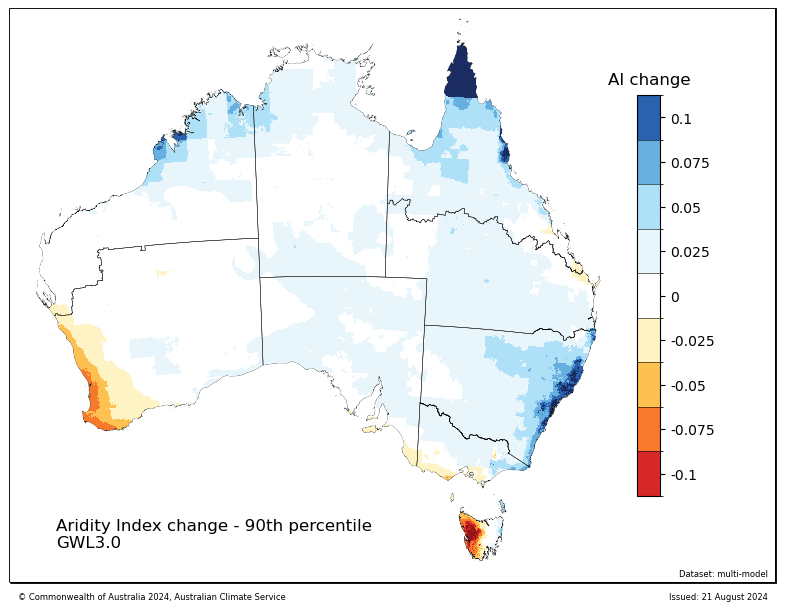

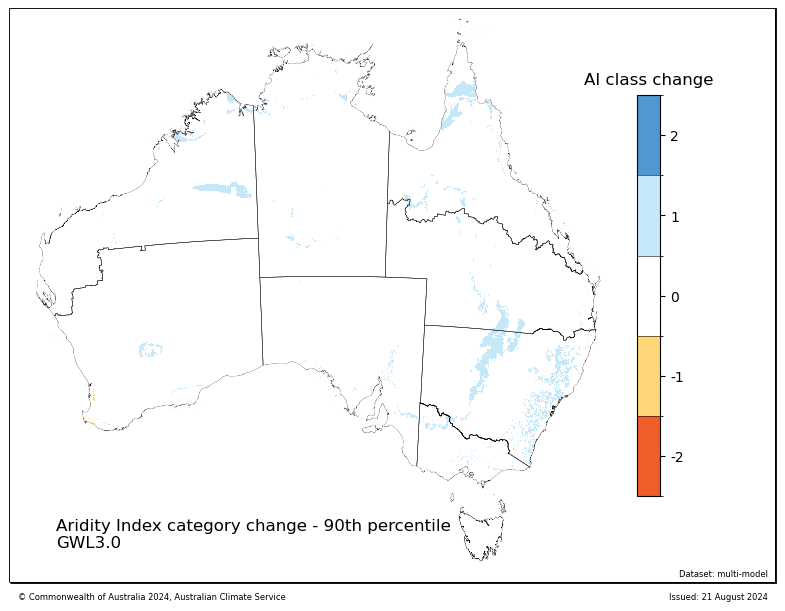

In [10]:
# GWL change
gwl = ["GWL15","GWL20","GWL30"]
for _gwl in gwl:
    print(f"GWL: {_gwl[:4]}.{_gwl[4:]}")
    
    prct_change = f"{_gwl}_prct-change-to-GWL12"
    quantiles_prct_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{prct_change}_percentiles10-50-90.nc")

    change = f"{_gwl}_change-to-GWL12"
    quantiles_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{change}_percentiles10-50-90.nc")

    zone_change = f"{_gwl}_zone-change-to-GWL12"
    quantiles_zones_ds = xr.open_dataset(f"{root_dir}{index}_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{zone_change}_percentiles10-50-90.nc")
    
    for q in quantiles:
        prcntl = int(q*100)
        print(f"Percentile: {prcntl}")
        quantiles_prct_da = quantiles_prct_ds.AI.sel(quantile=q).where(q_mask.mask)
        quantiles_da = quantiles_ds.AI.sel(quantile=q).where(q_mask.mask)
        quantiles_zone_da = quantiles_zones_ds.AI.sel(quantile=q).where(q_mask.mask)
        
        plot_acs_hazard(data = quantiles_prct_da,#.where(quantiles_da<0.65),
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index change - {prcntl}th percentile ",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["anom_r"],
                ticks = np.arange(-30, 35, 5),
                # tick_labels=np.arange(-30, 40, 10),
                cbar_label = "AI %-change",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{prct_change}_percentile{prcntl}_plot.png",
                );
        
        plot_acs_hazard(data = quantiles_da,#.where(quantiles_da<0.65),
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index change - {prcntl}th percentile ",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["anom_r"],
                ticks = [-.1, -.075, -.05, -.025, 0, .025, .05, .075, .1],
                tick_labels = [-.1, -.075, -.05, -.025, 0, .025, .05, .075, .1],
                cbar_label = "AI change",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{change}_percentile{prcntl}_plot.png",
                );

        plot_acs_hazard(data = quantiles_zone_da,
                regions = regions_dict['ncra_regions'],
                title = f"Aridity Index category change - {prcntl}th percentile",
                date_range = _gwl[:4]+"."+_gwl[4:],
                cmap = cmap_dict["anom_r"],
                ticks = [-2, -1, 0, 1, 2],
                tick_labels=[-2, -1, 0, 1, 2],
                cbar_label = "AI class change",
                dataset_name = "multi-model",
                watermark = "",
                outfile = f"{root_dir}figures/AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_{data_type}_{zone_change}_percentile{prcntl}_plot.png",
                );

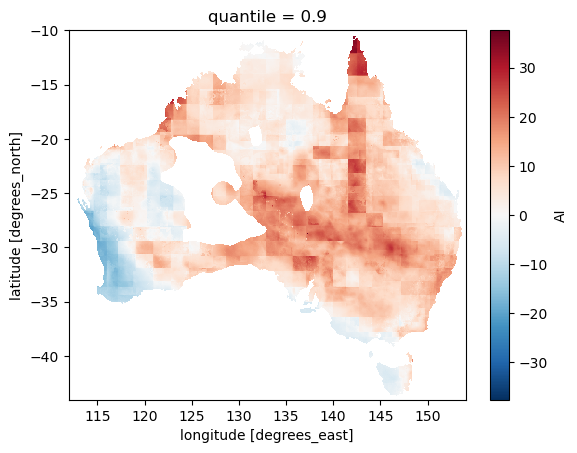

In [12]:
quantiles_prct_da.plot()

## Heatmaps

In [67]:
files = sorted(lib_david.get_file_paths(root_dir,".nc",include=[index,rcp,data_type],exclude=["percentiles","change","GWL40"]))
files_GWL12 = [file for file in files if 'GWL12' in file and 'r240x120' in file]
files_GWL12

['/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1__r240x120-ISIMIP2b_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_r240x120-QME_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1__r240x120-ISIMIP2b_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL12.nc',
 '/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_r24

In [68]:
len(files_GWL12)

16

In [103]:
def plot_heatmap(plot_df, GWL_level, variable_colourbar_switch=False):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    min_max_extent = {1.5:10, 2.0:15, 3.0:20}
    sns.set(font_scale=1.5)
    plt.figure(figsize=(18, 7))
    colors = sns.color_palette("BrBG_r", 12)
    cmap = ListedColormap(colors)
    
    ax = sns.heatmap(plot_df, annot=True, cmap=cmap, linewidth=2, fmt='.0f',
                     cbar_kws={'extend':'both', 'label':'Percent Change (%)'},
                     center=0,
                     vmin=-(min_max_extent[GWL_level]) if variable_colourbar_switch else -50,
                     vmax=(min_max_extent[GWL_level]) if variable_colourbar_switch else 50,
                     yticklabels=list(change_df['abbrevs']),
                     xticklabels=[key[:-5].replace('_', ' ').replace("r240x120-","").replace("CSIRO-CCAM-r3355-","CCAM") for key in plot_df.columns])
    
    ax.text(len(plot_df.columns) + 0.85, - 0.5, 'Median' , ha='center', va='center')
    ax.text(len(plot_df.columns) + 0.23, 12, r"$\bf{Bold}$" + ' = at least\n66% of ensemble\nmembers agree on \nsign of the change' , size=16, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.7", edgecolor="black", facecolor="none", linewidth=0.25))
    for i, row in plot_df.iterrows():
        median = row.median()
        sign_agreement = ((row>0).sum()/len(row)) if median > 0 else ((row<0).sum()/len(row))
        fontweight = 'bold' if sign_agreement >= 0.66 else 'normal'
        ax.text(len(plot_df.columns) + 0.85, i + 0.5, f'{median:.1f}', ha='center', va='center', fontweight=fontweight)
        
    # cbar = ax.collections[0].colorbar
    # cbar.ax.set_position([0.83, 0.15, 0.03, 0.7])

    #make sure zero values are not coloured positively
    for text in ax.texts:
        x, y = text.get_position()
        if text.get_text()=='0' and x<16:
            ax.text(x, y, f' {text.get_text()} ', ha='center', va='center', bbox=dict(pad=10.0, edgecolor="none", facecolor="lightgrey"))
    cbar = ax.collections[0].colorbar
    cbar.ax.set_position([0.83, 0.15, 0.03, 0.7])
    
    ax.set_title(f'% - change Aridity Index for GWL {str(GWL_level/10)} relative to GWL 1.2', fontweight='bold', pad=20)
    
    # plt.savefig(f'/g/data/mn51/users/dh4185/ai_figures/AI_regional_heatmap_change_GWL{GWL_level}.png', bbox_inches='tight')
    plt.show()
    plt.clf()
    return

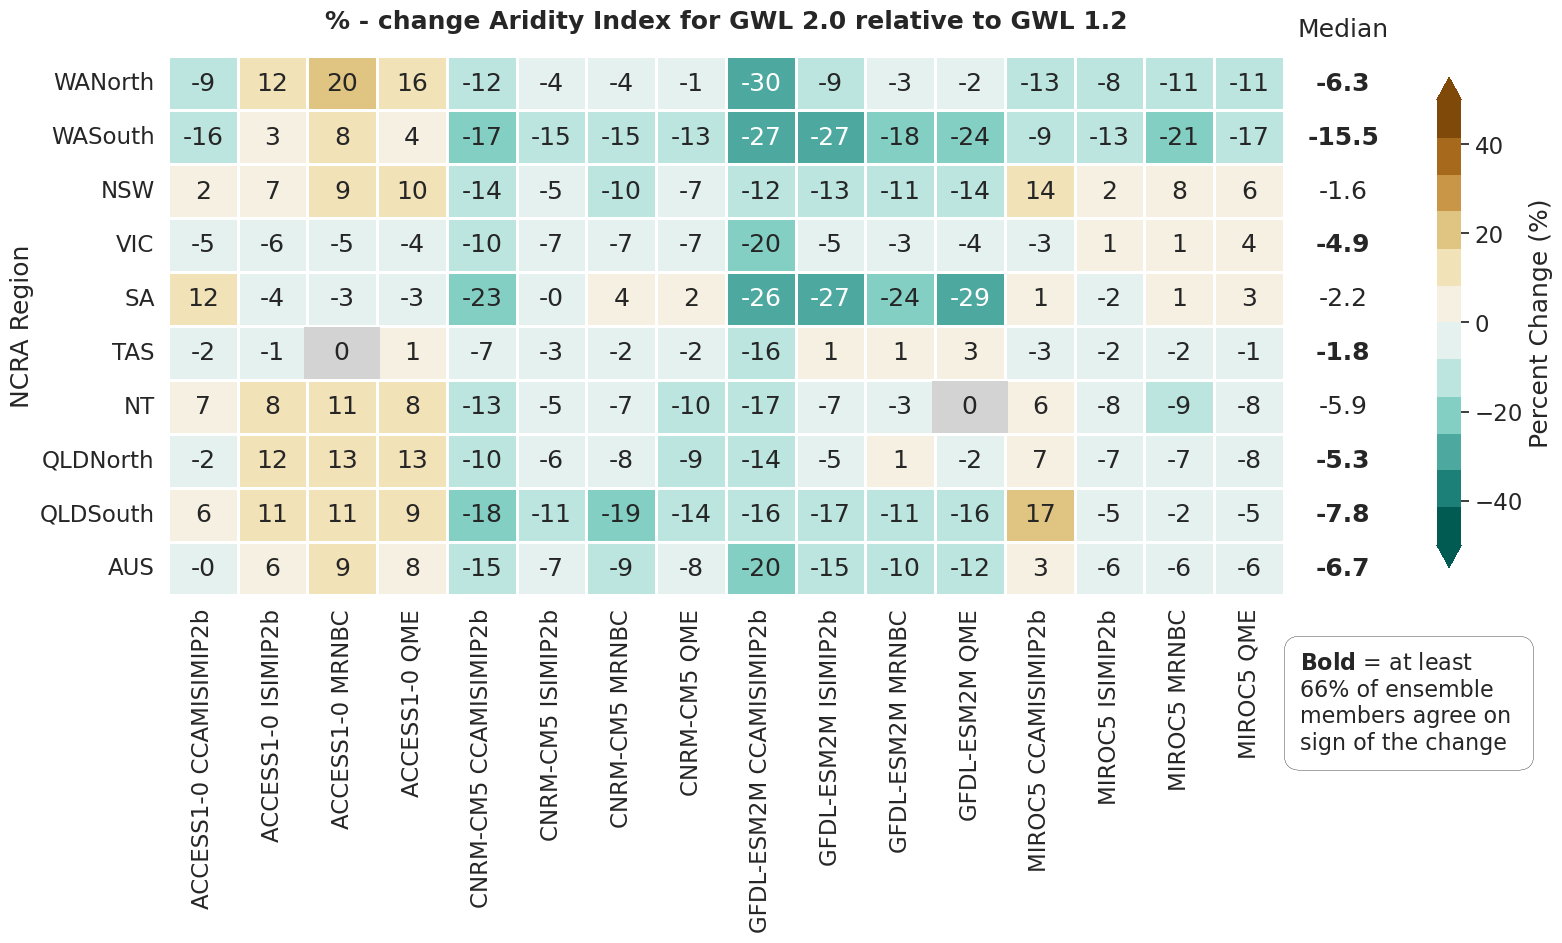

<Figure size 640x480 with 0 Axes>

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

variable_colourbar_switch=False

min_max_extent = {1.5:10, 2.0:15, 3.0:20}
sns.set(font_scale=1.5)
plt.figure(figsize=(18, 7))
colors = sns.color_palette("BrBG_r", 12)
cmap = ListedColormap(colors)

ax = sns.heatmap(plot_df, annot=True, cmap=cmap, linewidth=2, fmt='.0f',
                 cbar_kws={'extend':'both', 'label':'Percent Change (%)'},
                 center=0,
                 vmin=-(min_max_extent[GWL_level]) if variable_colourbar_switch else -50,
                 vmax=(min_max_extent[GWL_level]) if variable_colourbar_switch else 50,
                 yticklabels=list(change_df['abbrevs']),
                 xticklabels=[key[:-5].replace('_', ' ').replace("r240x120-","").replace("CSIRO-CCAM-r3355-","CCAM") for key in plot_df.columns])

ax.text(len(plot_df.columns) + 0.85, - 0.5, 'Median' , ha='center', va='center')
ax.text(len(plot_df.columns) + 0.23, 12, r"$\bf{Bold}$" + ' = at least\n66% of ensemble\nmembers agree on \nsign of the change' , size=16, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.7", edgecolor="black", facecolor="none", linewidth=0.25))
for i, row in plot_df.iterrows():
    median = row.median()
    sign_agreement = ((row>0).sum()/len(row)) if median > 0 else ((row<0).sum()/len(row))
    fontweight = 'bold' if sign_agreement >= 0.66 else 'normal'
    ax.text(len(plot_df.columns) + 0.85, i + 0.5, f'{median:.1f}', ha='center', va='center', fontweight=fontweight)
    
# cbar = ax.collections[0].colorbar
# cbar.ax.set_position([0.83, 0.15, 0.03, 0.7])

#make sure zero values are not coloured positively
for text in ax.texts:
    x, y = text.get_position()
    if text.get_text()=='0' and x<16:
        ax.text(x, y, f'  {text.get_text()}  ', ha='center', va='center', bbox=dict(pad=10.0, edgecolor="none", facecolor="lightgrey"))
cbar = ax.collections[0].colorbar
cbar.ax.set_position([0.83, 0.15, 0.03, 0.7])

ax.set_title(f'% - change Aridity Index for GWL {str(GWL_level/10)} relative to GWL 1.2', fontweight='bold', pad=20)

# plt.savefig(f'/g/data/mn51/users/dh4185/ai_figures/AI_regional_heatmap_change_GWL{GWL_level}.png', bbox_inches='tight')
plt.show()
plt.clf()

20
GWL12 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc
GWL20 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL20.nc
GWL12 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1__r240x120-ISIMIP2b_2D_GWL12.nc
GWL20 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1__r240x120-ISIMIP2b_2D_GWL20.nc
GWL12 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL12.nc
GWL20 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL20.nc
GWL12 file: /g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_r240x120-QME_2D_GWL12.nc
GWL20 file: /g/data/ia39/ncra/drou

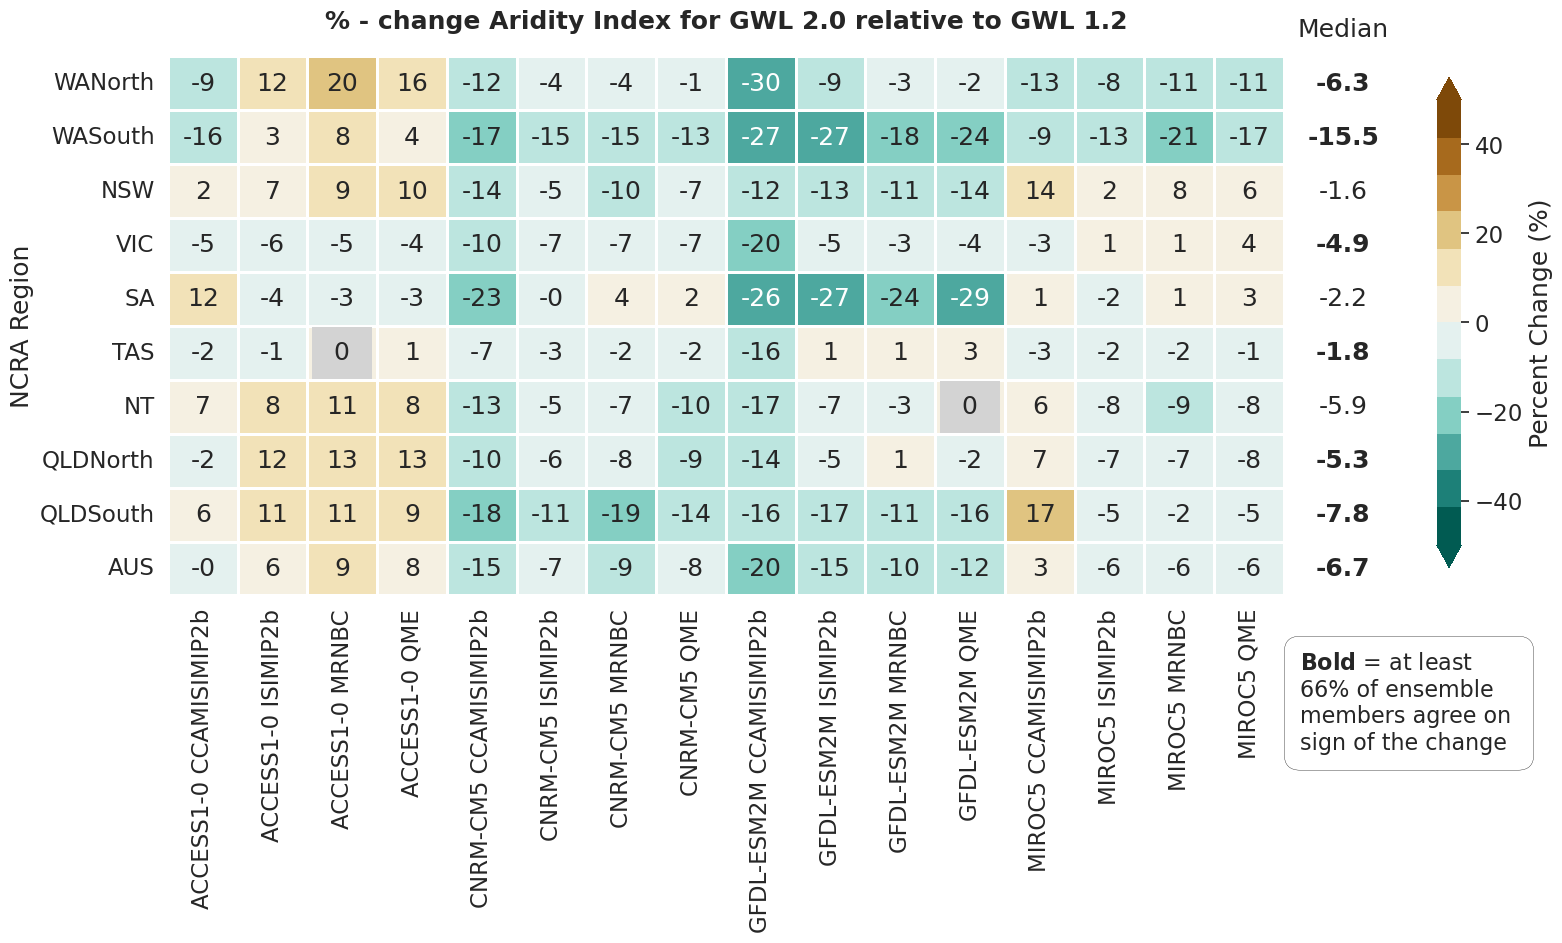

CPU times: user 5min 45s, sys: 25.9 s, total: 6min 11s
Wall time: 6min 11s


<Figure size 640x480 with 0 Axes>

In [196]:
%%time
min_max_extent = {1.5:10, 2.0:15, 3.0:20}
gwl = ["GWL12","GWL15","GWL20","GWL30"]


for GWL_level in [20]:#[15,20,30]:
    print(GWL_level)
    df_list = []
    for file_GWL12 in files_GWL12:
        print(f"GWL12 file: {file_GWL12}")
        file_GWLx = [file for file in files if file_GWL12.split('_')[3] in file and (("-").join(file_GWL12.split('-')[-4:]))[:-12] in file and f'GWL{str(GWL_level)}' in file][0]
        print(f"GWL{GWL_level} file: {file_GWLx}")
        
        ensemble_member_name = file_GWL12.split('_')[3]+" "+file_GWL12.replace("__","_").split('_')[-3] if "CCAM" in file_GWL12 == False else file_GWL12.split('_')[3]+" "+("-").join(file_GWL12.replace("__","_").split("_")[-3].split("-")[0:5])
        
        ds_GWLx = xr.open_dataset(file_GWLx).where(q_mask.mask)
        ds_GWL12 = xr.open_dataset(file_GWL12).where(q_mask.mask)
        GWLx_change = ((ds_GWLx - ds_GWL12)/ds_GWL12*100).rename({'AI': ensemble_member_name})      
        mask_frac = regions.mask_3D_frac_approx(GWLx_change)
        dims = ("lat", "lon",)
        change_df = acs_regional_stats(ds=GWLx_change,var=ensemble_member_name, mask=mask_frac, dims = dims, how = ["mean"]).to_dataframe()
        df_list.append(change_df[change_df.columns[-1]])

    plot_df = pd.concat(df_list, axis=1).rename_axis('NCRA Region')
    
    # print(f'---> Plotting GWL{str(GWL_level)} with variable colourbar across GWLs')
    # plot_heatmap(plot_df, GWL_level, variable_colourbar_switch=True)
    
    print(f'---> Plotting GWL{str(GWL_level/10)} with consistent colourbar across GWLs')
    plot_heatmap(plot_df, GWL_level, variable_colourbar_switch=False)



In [41]:
ds_GWLx = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_rcp85_bias-adjusted_2D_{GWL_level}.nc")
ds_GWLx.model
for model in ds_GWLx.model:
    print(str(model.data))
    ds_GWLx.drop_vars(["rcp","gwl"]).sel(model=model)


ACCESS1-0_CSIRO-CCAM-r3355-r240x120-ISIMIP2b
ACCESS1-0_r240x120-ISIMIP2b
ACCESS1-0_r240x120-MRNBC
ACCESS1-0_r240x120-QME
CNRM-CM5_CSIRO-CCAM-r3355-r240x120-ISIMIP2b
CNRM-CM5_r240x120-ISIMIP2b
CNRM-CM5_r240x120-MRNBC
CNRM-CM5_r240x120-QME
GFDL-ESM2M_CSIRO-CCAM-r3355-r240x120-ISIMIP2b
GFDL-ESM2M_r240x120-ISIMIP2b
GFDL-ESM2M_r240x120-MRNBC
GFDL-ESM2M_r240x120-QME
MIROC5_CSIRO-CCAM-r3355-r240x120-ISIMIP2b
MIROC5_r240x120-ISIMIP2b
MIROC5_r240x120-MRNBC
MIROC5_r240x120-QME


/jobfs/123332934.gadi-pbs/ipykernel_672595/3139067772.py:5: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  ds_GWLx.drop(["rcp","gwl"]).sel(model=model)


In [101]:
filename = "/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_MIROC5_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL15.nc"


In [113]:
ensemble_member_name = file_GWL12.split('_')[3]+" "+file_GWL12.split('_')[-3] if "CCAM" in file_GWL12 == False else file_GWL12.split('_')[3]+" "+("-").join(filename.split("_")[-3].split("-")[0:2])

In [58]:
plot_df

ACCESS1-0 CSIRO-CCAM-r3355-r240x120-ISIMIP2b_mean  \
NCRA Region                                                      
0                                                    -6.848524   
1                                                   -14.187956   
2                                                     2.380775   
3                                                    -5.225444   
4                                                    10.037140   
5                                                    -1.720880   
6                                                     7.305468   
7                                                    -1.641232   
8                                                     6.249963   
9                                                    -0.396095   

             ACCESS1-0 r240x120-ISIMIP2b_mean  ACCESS1-0 r240x120-MRNBC_mean  \
NCRA Region                                                                    
0                                   14.052769                      29.759509   
1                                    2.731651                      13.970197   
2                                    7.092961                       9.016340   
3                                   -5.778011                      -5.302559   
4                                   -4.369006                      -3.704265   
5                                   -0.589925                       0.229425   
6                                    8.325143                      11.624346   
7                                   12.004726                      12.944300   
8                                   10.670485                      10.557607   
9                                    6.464767                      11.743031   

             ACCESS1-0 r240x120-QME_mean  \
NCRA Region                                
0                              19.433727   
1                               3.102239   
2                               9.887031   
3                              -4.230457   
4                              -2.767894   
5                               0.655869   
6                               8.370286   
7                              13.426319   
8                               9.060512   
9                               7.784029   

             CNRM-CM5 CSIRO-CCAM-r3355-r240x120-ISIMIP2b_mean  \
NCRA Region                                                     
0                                                  -12.391237   
1                                                  -16.891128   
2                                                  -13.628853   
3                                                  -10.301859   
4                                                  -22.736317   
5                                                   -6.796717   
6                                                  -12.851308   
7                                                  -10.376665   
8                                                  -17.742270   
9                                                  -15.130606   

             CNRM-CM5 r240x120-ISIMIP2b_mean  CNRM-CM5 r240x120-MRNBC_mean  \
NCRA Region                                                                  
0                                  -2.709693                      6.169710   
1                                 -13.723360                     -9.281655   
2                                  -5.074006                     -9.808858   
3                                  -6.729684                     -7.393058   
4                                  -0.948525                      5.805896   
5                                  -2.602816                     -2.288229   
6                                  -4.247192                     -6.736629   
7                                  -5.927471                     -7.556696   
8                                 -10.903353                    -18.659463   
9                                  -6.558590                     -5.695133   

            

In [193]:
miroc_GWL12 = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_MIROC5_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL12.nc").where(q_mask.mask)
miroc_GWL20 = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_MIROC5_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL20.nc").where(q_mask.mask)
GWLx_change = ((miroc_GWL20 - miroc_GWL12)/miroc_GWL12*100).rename({'AI': 'MIROC-MRNBC'})

In [194]:
mask_frac = regions.mask_3D_frac_approx(GWLx_change)
dims = ("lat", "lon")
change_df = acs_regional_stats(ds=GWLx_change,var='MIROC-MRNBC', mask=mask_frac, dims = dims, how = ["mean"])#.to_dataframe()

In [195]:
change_df['MIROC-MRNBC_mean']#.plot()

<xarray.DataArray 'MIROC-MRNBC_mean' (region: 10)> Size: 80B
array([-10.93719234, -21.36184919,   7.92936673,   0.85744764,
         1.02585846,  -1.80712949,  -8.69356692,  -6.93767978,
        -2.34992449,  -6.49585561])
Coordinates:
  * region   (region) int64 80B 0 1 2 3 4 5 6 7 8 9
    abbrevs  (region) <U8 320B 'WANorth' 'WASouth' 'NSW' ... 'QLDSouth' 'AUS'
    names    (region) <U48 2kB 'Western Australia North' ... 'Australia'

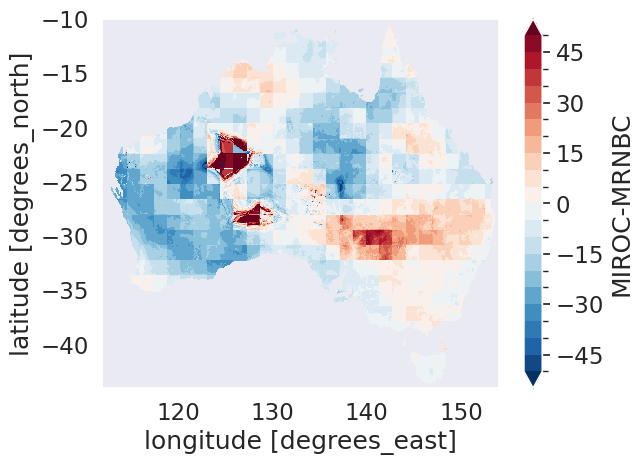

In [75]:
GWLx_change['MIROC-MRNBC'].plot(levels=np.arange(-50,55,5))

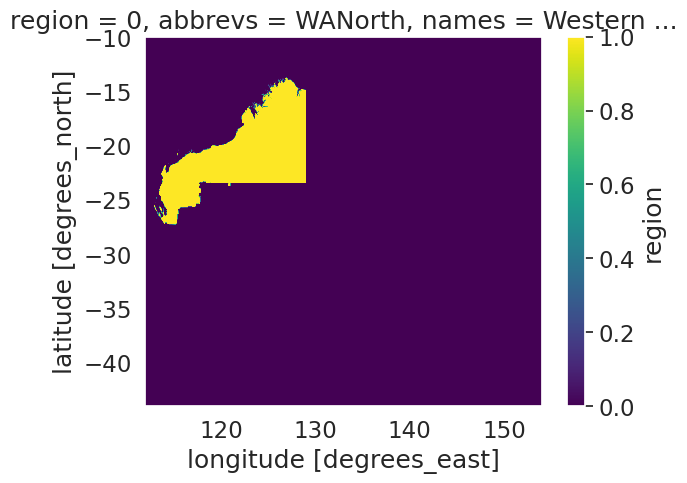

In [81]:
mask_frac.sel(region=0).plot()